In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data)


In [3]:
id = df[df["gender"] == "Other"].index
df = df.drop(id)
donnees_dupliquees = df.duplicated().any()

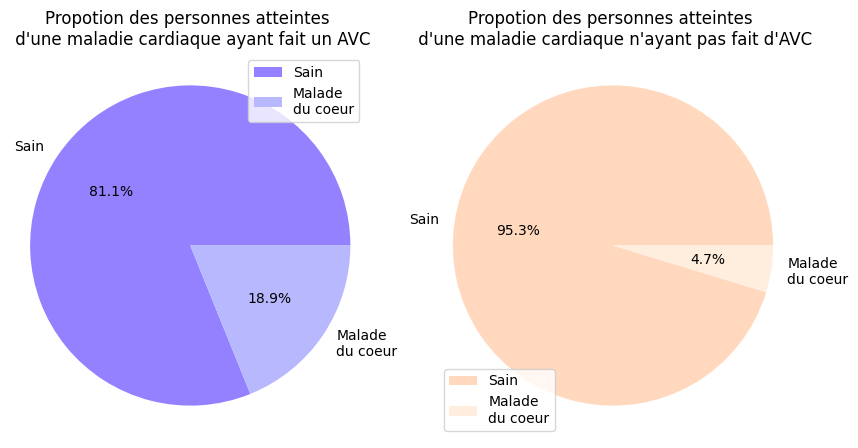

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
heart_diseases_stroke = df[df["stroke"] == 1]['heart_disease'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(heart_diseases_stroke, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"])
plt.title("Propotion des personnes atteintes \n d'une maladie cardiaque ayant fait un AVC")
plt.axis('equal') 
plt.legend()

heart_diseases_healthy = df[df["stroke"] == 0]['heart_disease'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(heart_diseases_healthy, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0, colors=["#FFD8BE","#FFEEDD"])
plt.title("Propotion des personnes atteintes \n d'une maladie cardiaque n'ayant pas fait d'AVC")
plt.axis('equal') 
plt.legend()
plt.show()

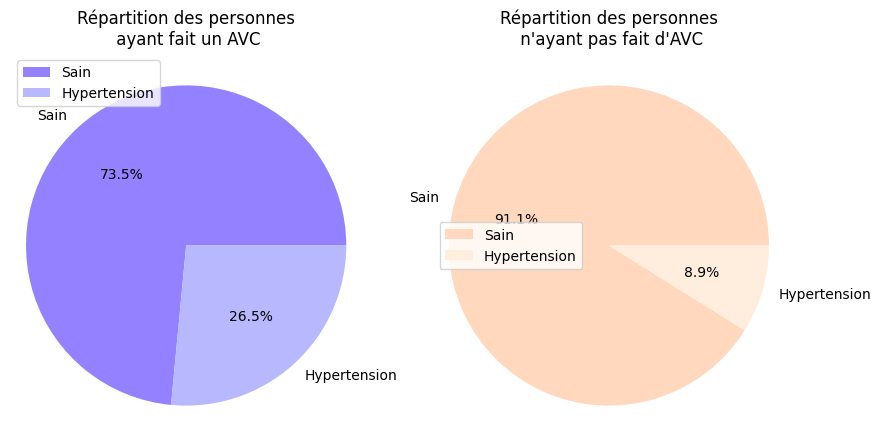

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
hypertension_stroke = df[df["stroke"] == 1]['hypertension'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(hypertension_stroke, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"])
plt.title("Répartition des personnes\n ayant fait un AVC")
plt.axis('equal') 
plt.legend()

hypertension_healthy = df[df["stroke"] == 0]['hypertension'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(hypertension_healthy, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0, colors=["#FFD8BE","#FFEEDD"])
plt.title("Répartition des personnes\n n'ayant pas fait d'AVC")
plt.axis('equal') 
plt.legend()

plt.show()

In [6]:
from sklearn.calibration import LabelEncoder
import plotly.express as px

le = LabelEncoder()
df_par = df.copy()
for col in df.select_dtypes(exclude=['int64', 'float', 'float64', 'int']).columns:
    df_par[col] = le.fit_transform(df_par[col])
fig = px.parallel_coordinates(df_par.drop(columns=['id']), color="stroke", title='Visualization of Multivariate Data')

fig.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['bmi'])
df_new = df_copy.drop(columns=['id','gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
fig = px.parallel_coordinates(df_new, color="stroke", title='Visualisation de la répartition des individus en fonction de leur âge, leur taux de glucose et leur IMC', color_continuous_scale=["#FFD8BE","#9381FF"], labels={"age": "Age", "avg_glucose_level": "Taux de glucose", "bmi": "IMC", "stroke": "AVC"})
fig.update_layout(
    coloraxis_colorbar=dict(
        title="AVC",
        tickvals=[0, 1],
        ticktext=["Non", "Oui"],
    )
)

fig.show()